In [105]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Idade = age

Renda = income

Valor do emprestimo = loan_amount


Score de crédito = credit score


default (cliente inadiplente (1) ou não(0))]

In [106]:
df = pd.read_csv(r'dataset\credit-data.csv', index_col=False)

In [107]:
df.head()

,age,income,loan_amount,credit_score,employment_status,default
0,56,5343,8941,818,Unemployed,0
1,69,7308,6569,436,Unemployed,1
2,46,6070,5300,797,Self-Employed,0
3,32,6799,7269,776,Self-Employed,0
4,60,3470,4818,522,Unemployed,0


Análise Exploratória de Dados (EDA)

In [108]:
df.describe()

,age,income,loan_amount,credit_score,default
count,500.000000,500.00000,500.0000,500.00000,500.000000
mean,44.220000,6043.76000,5566.7720,572.38800,0.192000
std,15.036082,2213.10756,2551.6032,156.31051,0.394268
min,18.000000,2009.00000,1005.0000,300.00000,0.000000
25%,32.000000,4148.25000,3364.0000,442.00000,0.000000
50%,45.000000,6074.50000,5556.5000,584.00000,0.000000
75%,57.000000,7871.00000,7745.0000,694.00000,0.000000
max,69.000000,9939.00000,9996.0000,848.00000,1.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                500 non-null    int64 
 1   income             500 non-null    int64 
 2   loan_amount        500 non-null    int64 
 3   credit_score       500 non-null    int64 
 4   employment_status  500 non-null    object
 5   default            500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


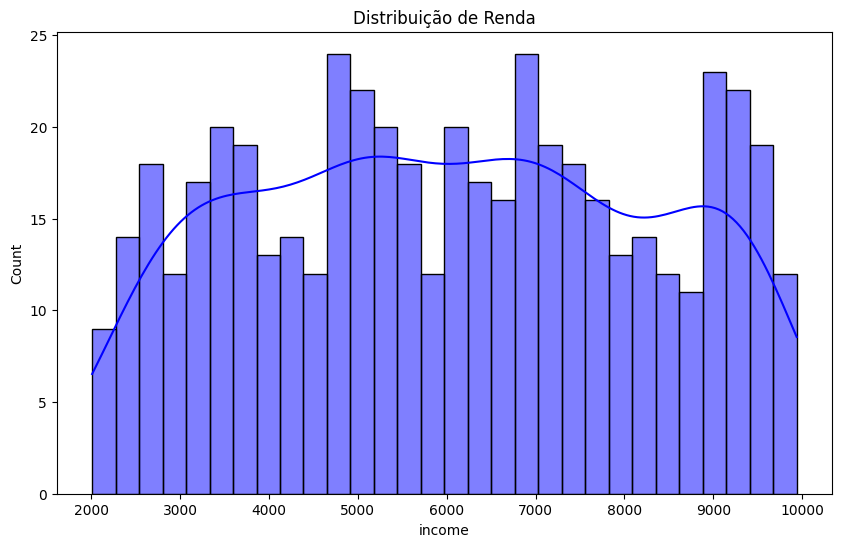

In [110]:
#Visualizando Distribuíção

plt.figure(figsize=(10,6))
sns.histplot(df['income'], kde=True, bins=30, color='blue')
plt.title('Distribuição de Renda')
plt.show()

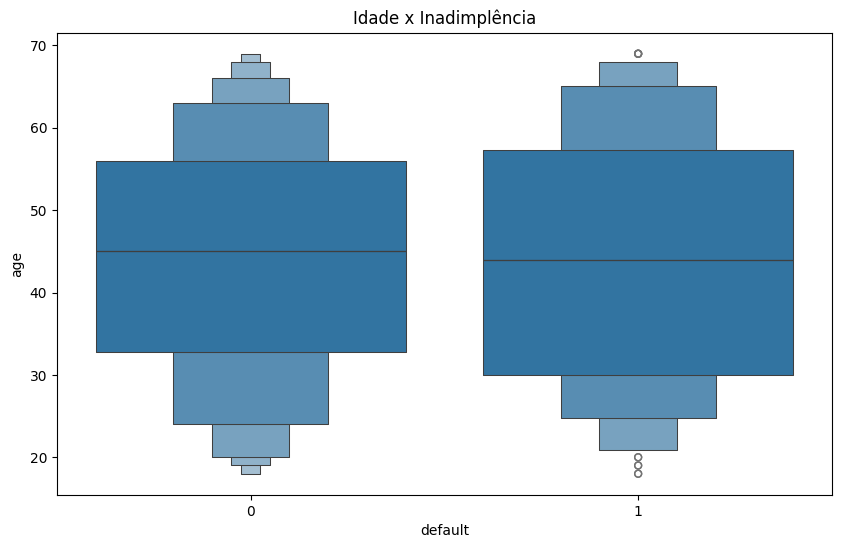

In [111]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='default', y='age', data=df)
plt.title('Idade x Inadimplência')
plt.show()


Limpeza e Tratamento de Dados

In [112]:
#Transformar variaveis categóricas em numéricas
df['employment_status'] = df['employment_status'].map({
    'Employed' : 0, 'Unemployed' : 1, 'Self-Employed': 2 
})

In [113]:
#Criando razão entre emprestimo/renda
df['loan_income_ration'] = df['loan_amount']/df['income']

#Verificando valores nulos
df.isnull().sum()

age                   0
income                0
loan_amount           0
credit_score          0
employment_status     0
default               0
loan_income_ration    0
dtype: int64

Divisão dos Dados em Treinamento e Teste

In [114]:
#Separando variáveis indepedentes(x) e alvo(y)
X = df.drop(['default'], axis=1)
y = df['default']

In [115]:
#Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (400, 6)
Tamanho do conjunto de teste: (100, 6)


Treinamento de um Modelo de Classificação

In [116]:
#Treinando o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Fazendo previsões
y_pred = model.predict(X_test)

#Avaliando o modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        80
           1       0.20      0.05      0.08        20

    accuracy                           0.77       100
   macro avg       0.50      0.50      0.47       100
weighted avg       0.68      0.77      0.71       100



Explicação:

    Usamos um RandomForestClassifier para classificar clientes como inadimplentes ou não.
    Avaliamos o desempenho com métricas como precisão, recall e F1-score.

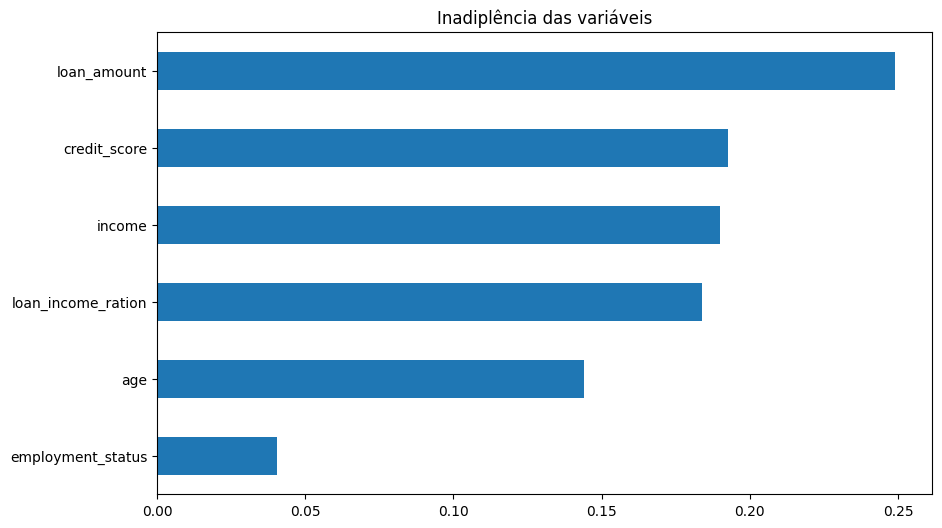

In [117]:
#Importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Inadiplência das variáveis')
plt.show()

Explicação: As variáveis mais importantes mostram quais características têm maior impacto na decisão do modelo, ajudando a empresa a ajustar sua política.